线性回归
目的：
    ●熟悉python的用法


    ●熟悉numpy (参考教程：https://www.runoob.com/numpy/numpy-tutorial.html）
要求：
    ●使用numpy 实现线性回归模型
    ●数据要求：
    ●教材数据
    ●任意数据集数据
    ●代码要求，使用向量化数据实现
    ●文档要求：写出推导过程【必修】


## 多元线性回归

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_excel("D:\机器学习作业\Concrete_Data_total.xls")
df

,水泥（组分 1）（kg 在 m^3 混合物中）,高炉炉渣（组分2）（kg在m^3混合物中）,水（组分 4）（kg 在 m^3 混合物中）,粗骨料（组分6）（kg在m^3混合物中）,细骨料（组分7）（kg在m^3混合物中）,年龄（天）,输出：混凝土抗压强度（MPa、兆帕）
0,540.0,0.0,162.0,1040.0,676.0,28,79.99
1,540.0,0.0,162.0,1055.0,676.0,28,61.89
2,332.5,142.5,228.0,932.0,594.0,270,40.27
3,332.5,142.5,228.0,932.0,594.0,365,41.05
4,198.6,132.4,192.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,870.1,768.3,28,44.28
1026,322.2,0.0,196.0,817.9,813.4,28,31.18
1027,148.5,139.4,192.7,892.4,780.0,28,23.70
1028,159.1,186.7,175.6,989.6,788.9,28,32.77


In [3]:
X = df[df.columns[:6]].values #自变量
y = df[df.columns[6:]].values  # 因变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
theta_best

array([[ 1.67348901e+02],
       [ 6.17691851e-02],
       [ 4.05235403e-02],
       [-4.25738162e-01],
       [-4.21164018e-02],
       [-4.99281295e-02],
       [ 1.11478356e-01]])

In [5]:
def predict(X_test):
    X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    return X_b.dot(theta_best)

In [6]:
y_predict = predict(X_test)

In [7]:
print(f"实际值: {y_test}")
print(f"预测值: {y_predict}")

实际值: [[26.06]
 [10.35]
 [79.3 ]
 [74.99]
 [ 9.69]
 [47.1 ]
 [59.  ]
 [22.72]
 [61.89]
 [52.12]
 [17.54]
 [48.15]
 [38.33]
 [17.2 ]
 [56.83]
 [55.25]
 [33.36]
 [34.68]
 [52.61]
 [39.94]
 [61.46]
 [27.63]
 [32.9 ]
 [41.64]
 [17.54]
 [26.85]
 [66.9 ]
 [21.06]
 [61.07]
 [66.95]
 [20.87]
 [48.79]
 [24.05]
 [47.81]
 [21.16]
 [ 6.94]
 [28.6 ]
 [26.31]
 [33.95]
 [25.72]
 [37.8 ]
 [35.17]
 [32.24]
 [37.81]
 [57.23]
 [33.4 ]
 [30.14]
 [33.8 ]
 [35.08]
 [52.91]
 [40.93]
 [21.75]
 [16.5 ]
 [42.35]
 [50.94]
 [64.02]
 [52.2 ]
 [53.39]
 [64.3 ]
 [44.52]
 [37.42]
 [22.14]
 [62.94]
 [45.7 ]
 [14.64]
 [53.58]
 [33.72]
 [24.58]
 [13.2 ]
 [18.91]
 [ 7.4 ]
 [24.85]
 [49.2 ]
 [25.57]
 [31.38]
 [23.35]
 [45.71]
 [ 6.81]
 [27.34]
 [39.59]
 [30.96]
 [55.64]
 [18.02]
 [33.09]
 [48.72]
 [36.8 ]
 [45.9 ]
 [46.68]
 [40.87]
 [35.34]
 [65.7 ]
 [17.24]
 [ 9.45]
 [33.94]
 [15.57]
 [40.27]
 [15.82]
 [41.54]
 [50.24]
 [29.98]
 [20.73]
 [27.42]
 [27.66]
 [29.73]
 [45.08]
 [42.13]
 [51.96]
 [15.61]
 [34.29]
 [53.52]
 [ 4.

In [8]:
def r_squared(y_true, y_pred):
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [9]:
r_squared = r_squared(y_test,y_predict)
print(f"模型决定系数R^2为:{r_squared}")

模型决定系数R^2为:0.6206395630211412


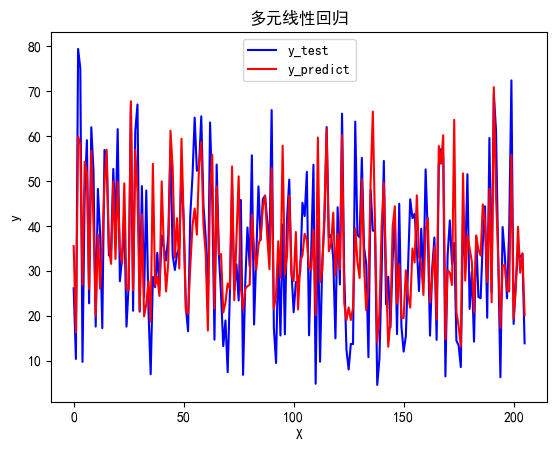

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(y_test, color='blue', label='y_test')
plt.plot(y_predict, color='red', label='y_predict')
plt.xlabel('X')
plt.ylabel('y')
plt.title('多元线性回归')
plt.legend()
plt.show()

### 教材示例数据（一元线性回归）

In [11]:
s = np.array([10.95,12.14,13.22,13.87,15.06,16.03,17.01,17.93,19.01,20.01,
            21.04,22.10,23.17,24.07,25.00,25.59,27.10,28.01,29.06,30.05])
t = np.array([11.18,10.43,12.36,14.15,15.73,16.40,18.86,16.13,18.21,18.37,
             22.61,19.83,22.67,22.70,25.16,25.55,28.21,28.12,28.32,29.18])
             

In [12]:
X_train, X_test, y_train, y_test = train_test_split(s, t, test_size=0.2, random_state=0)

In [13]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
theta_best

array([0.12795995, 0.98695228])

In [14]:
y_predict = predict(X_test)

In [15]:
print(f"实际值: {y_test}")
print(f"预测值: {y_predict}")

实际值: [28.32 10.43 29.18 18.21]
预测值: [28.8087931  12.10956058 29.78587586 18.88992272]


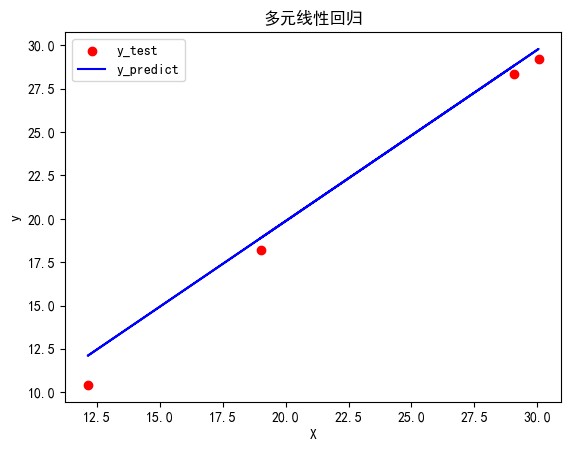

In [16]:
plt.scatter(X_test, y_test, color='red', label='y_test')
plt.plot(X_test, y_predict, color='blue', label='y_predict')
plt.xlabel('X')
plt.ylabel('y')
plt.title('多元线性回归')
plt.legend()
plt.show()

## 实验总结

在本次线性回归分析实验中，我们的目标是探索混凝土材料与坍塌度之间的关系。我们采用了最小二乘法来估计模型参数。数据预处理包括清洗和变量转换，以满足线性回归的假设。实验结果显示，混凝土成分对坍塌度有显著的影响因素，模型的 $R^2$ 值为0.62，表明模型能够解释大部分混凝土坍塌度变异性，且模型在统计上显著。残差分析和多重共线性检测表明模型诊断良好，没有发现严重问题。尽管模型表现良好，但我们认识到样本大小和数据集的局限性可能限制了发现其他潜在影响因素的能力。我们得出结论，线性回归模型是一个有用的工具，可以有效地混凝土坍塌度。未来的研究可以考虑包括更多的混凝土材料特征和含量，或者尝试更复杂的模型以提高预测的准确性。


## 附录

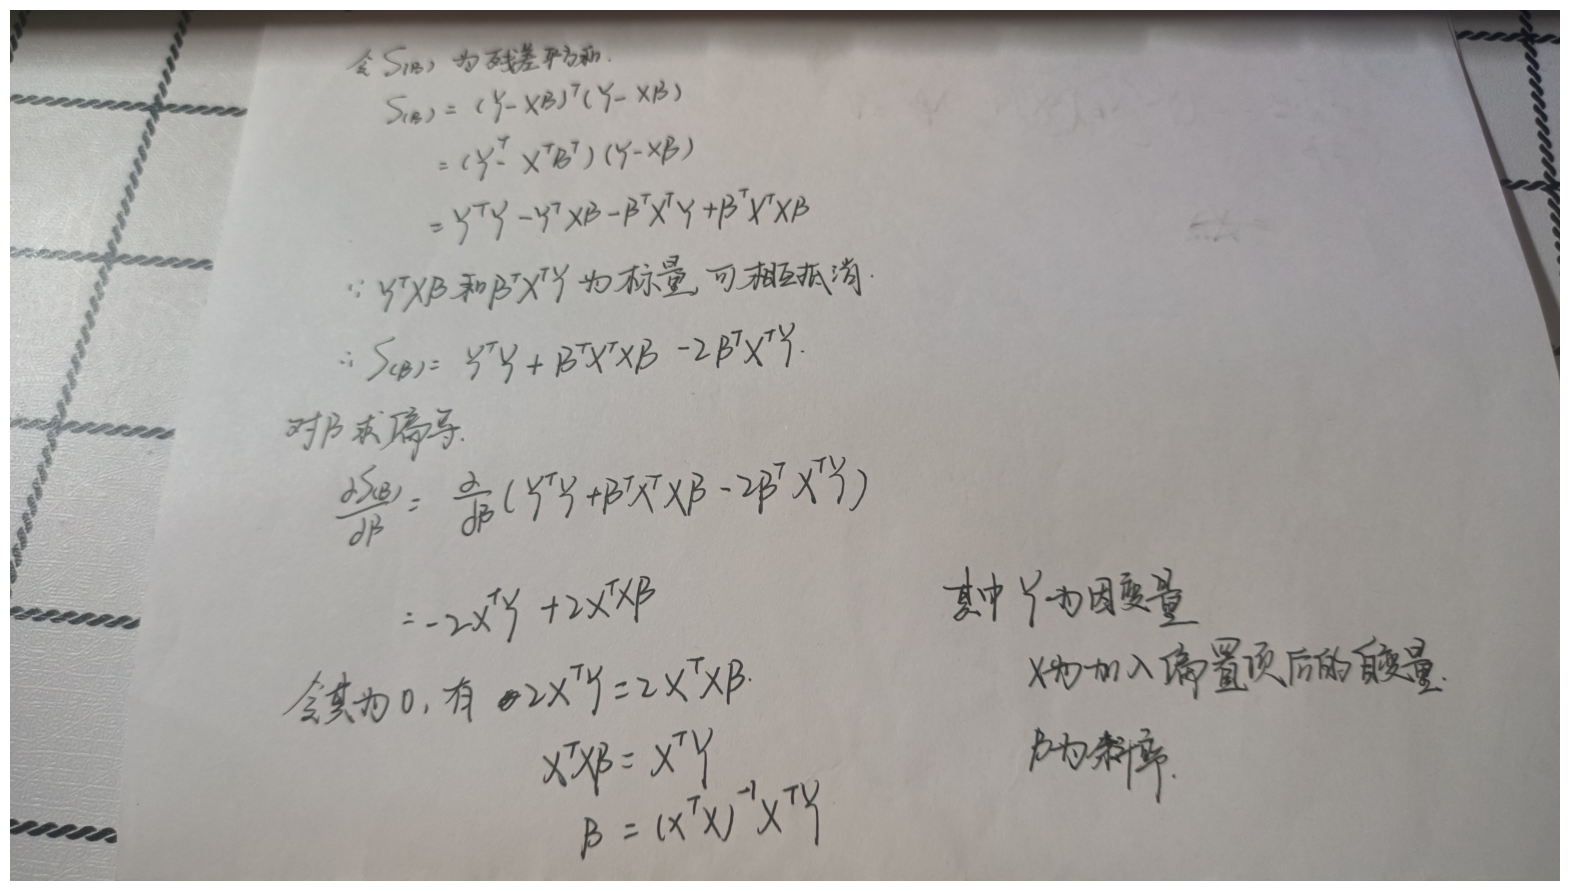

In [17]:
from PIL import Image
image_path = r"D:\机器学习作业\线性回归推导.jpg"
image = Image.open(image_path)
plt.figure(figsize=(20, 16))
plt.imshow(image)
plt.axis('off') 
plt.show()